Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#### Load the automobile dataset 
df = pd.read_csv('automobile.txt', na_values='?')

# save data into a csv file
df.to_csv('automobile.csv', index=False)

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [10]:
# Code here
# cleaning the ? values
df.dropna(inplace=True)

# converting peak-rpm, horsepower, and price to numeric data
cols_to_convert = ['peak-rpm', 'horsepower', 'price']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# removing duplicate rows
df.drop_duplicates(inplace=True)

# save data into a cleaned csv file
df.to_csv('automobile_cleaned.csv', index=False)

#### Remove any duplicate rows

In [ ]:
# already done above

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [ ]:
# already done above

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [ ]:
# already done above

Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [ ]:
# already converted peak-rpm, horsepower, and price to numeric data above

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [ ]:
# None of the automobile data is in JSON format

### Finding Certain Genres
 Create a dataframe with all the cars in the "Turbo" aspiration

In [13]:
# Filter for cars with "turbo" aspiration
turbo_aspiration_cars = df[df["aspiration"] == "turbo"][['make', 'aspiration']]

print(turbo_aspiration_cars)

              make aspiration
8             audi      turbo
23           dodge      turbo
29           dodge      turbo
67   mercedes-benz      turbo
68   mercedes-benz      turbo
69   mercedes-benz      turbo
70   mercedes-benz      turbo
79      mitsubishi      turbo
80      mitsubishi      turbo
87      mitsubishi      turbo
105         nissan      turbo
108         peugot      turbo
112         peugot      turbo
116         peugot      turbo
117         peugot      turbo
119       plymouth      turbo
136           saab      turbo
137           saab      turbo
145         subaru      turbo
149         subaru      turbo
174         toyota      turbo
187     volkswagen      turbo
198          volvo      turbo
199          volvo      turbo
201          volvo      turbo
203          volvo      turbo
204          volvo      turbo


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive cars? 

How do the most expensive and cheapest cars compare? Exploring the most expensive cars highlights if some cars are worth the money spent on them based on their price to miles per gallon ratio

In [21]:
# Code here
print("1. 5 Most Expensive Cars:")
top_5_expensive_cars = df.sort_values(by='price', ascending=False).head(5)
print(top_5_expensive_cars[['make', 'price']])
print("\n")

print("2. Cheapest car:")
cheapest_car = df.sort_values(by='price', ascending=True).head(1)
print(cheapest_car[['make', 'price']])
print("\n")


print("Price:MPG Ratio for top 5 cars and cheapest car:")
# Calculate and display price to MPG ratios for the top 5 expensive cars
top_5_expensive_cars['price_to_city_mpg'] = top_5_expensive_cars['price'] / top_5_expensive_cars['city-mpg']
top_5_expensive_cars['price_to_highway_mpg'] = top_5_expensive_cars['price'] / top_5_expensive_cars['highway-mpg']

print(top_5_expensive_cars[['make', 'price_to_city_mpg', 'price_to_highway_mpg']])

# Calculate and display the ratio for the cheapest car
cheapest_car['price_to_city_mpg'] = cheapest_car['price'] / cheapest_car['city-mpg']
cheapest_car['price_to_highway_mpg'] = cheapest_car['price'] / cheapest_car['highway-mpg']

print(cheapest_car[['make', 'price_to_city_mpg', 'price_to_highway_mpg']])






1. 5 Most Expensive Cars:
             make    price
72  mercedes-benz  35056.0
47         jaguar  32250.0
70  mercedes-benz  31600.0
68  mercedes-benz  28248.0
69  mercedes-benz  28176.0


2. Cheapest car:
       make   price
138  subaru  5118.0


Price:MPG Ratio for top 5 cars and cheapest car:
             make  price_to_city_mpg  price_to_highway_mpg
72  mercedes-benz        2191.000000           1947.555556
47         jaguar        2150.000000           1697.368421
70  mercedes-benz        1436.363636           1264.000000
68  mercedes-benz        1284.000000           1129.920000
69  mercedes-benz        1280.727273           1127.040000
       make  price_to_city_mpg  price_to_highway_mpg
138  subaru         165.096774            142.166667


Price-to-City MPG:

The car from Mercedes-Benz with an index of 72 has the highest price per City MPG (2191), meaning you're paying approximately $2191 for every mile per gallon in city conditions.
The cheapest car from Subaru has a price-to-city MPG ratio of about 165.1, suggesting it offers better fuel economy in city conditions relative to its price.

Price-to-Highway MPG:

Again, the Mercedes-Benz car with an index of 72 also has the highest price per Highway MPG (1947.55), suggesting it's relatively more expensive considering its highway fuel efficiency.
The Subaru, being the cheapest car, has a price-to-highway MPG ratio of about 142.17, indicating it offers a more cost-effective fuel economy on highways.



#### What are the top 5 fastest cars? 

In [22]:
# Code here
# Identifying Cars with Highest Horsepower

# Sorting the dataframe by horsepower in descending order and taking the top 5
top_5_fastest_cars = df.sort_values(by='horsepower', ascending=False).head(5)

print(top_5_fastest_cars[['make', 'horsepower']])





       make  horsepower
105  nissan       200.0
47   jaguar       176.0
198   volvo       162.0
199   volvo       162.0
178  toyota       161.0


#### Highest cylinder count
Create a bar plot explaining the number of cylinders relative to horsepower.

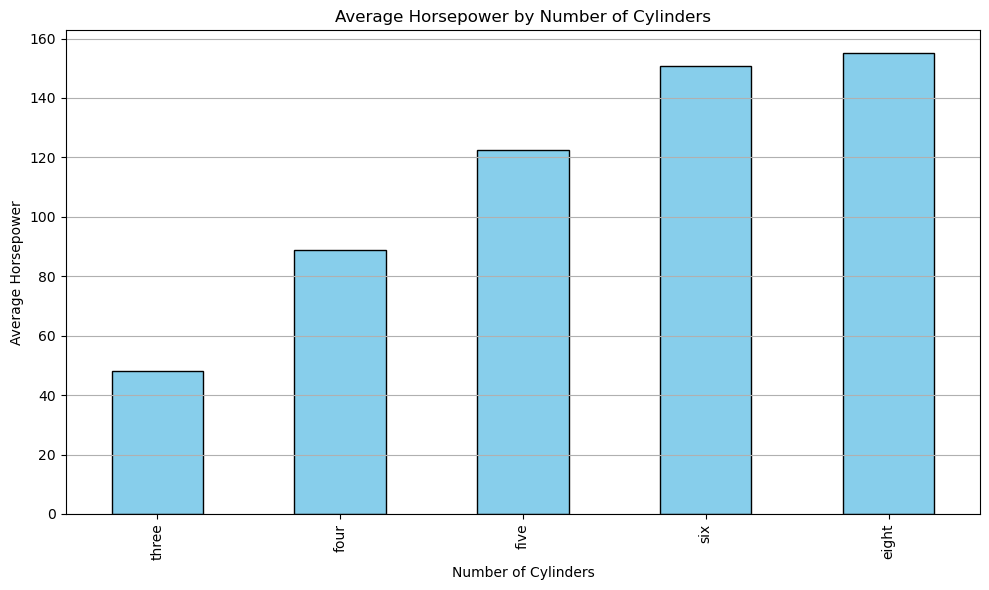

In [23]:
 # Code here
avg_horsepower_by_cylinders = df.groupby('num-of-cylinders')['horsepower'].mean().sort_values()

# Creating Bar Plot
plt.figure(figsize=(10, 6))
avg_horsepower_by_cylinders.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Horsepower by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Average Horsepower')
plt.grid(axis='y')

# displaying the plot
plt.tight_layout()
plt.show()

From the bar plot above we can see that cars with more cylinders generally produce more horsepower. This is because with more cylinders, engines can combust a larger amount of fuel and air during each rotation of the engine's cycle, which generates more power.

# Generate three different interesting visualisations with a data story.

Visualization 1: Scatter Plot - Price vs. Horsepower

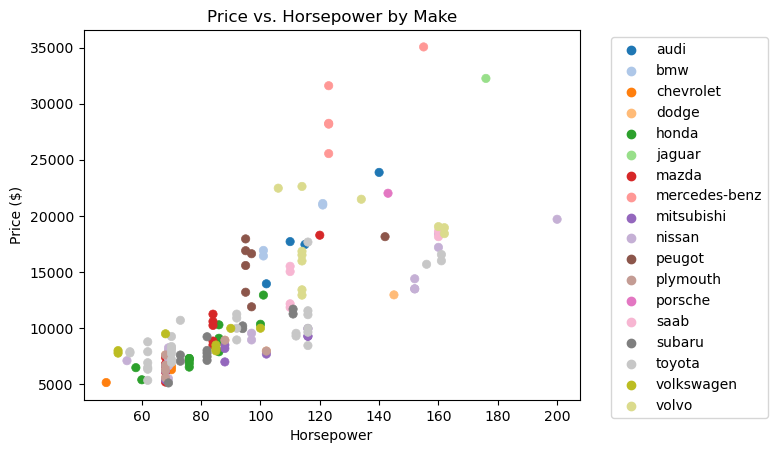

In [26]:
# plotting scatter plot
sns.scatterplot(data=df, x='horsepower', y='price', hue='make', palette='tab20', edgecolor=None)
plt.title("Price vs. Horsepower by Make")
plt.xlabel("Horsepower")
plt.ylabel("Price ($)")

# plotting legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

From this visualization, we can observe that there is a positive correlation between horsepower and price for many makes. This indicates that as the horsepower of a car increases, its price also tends to increase, possibly because higher horsepower cars are marketed as luxury or sports vehicles.

Visualization 2: Box Plot - Distribution of Prices across Body Styles

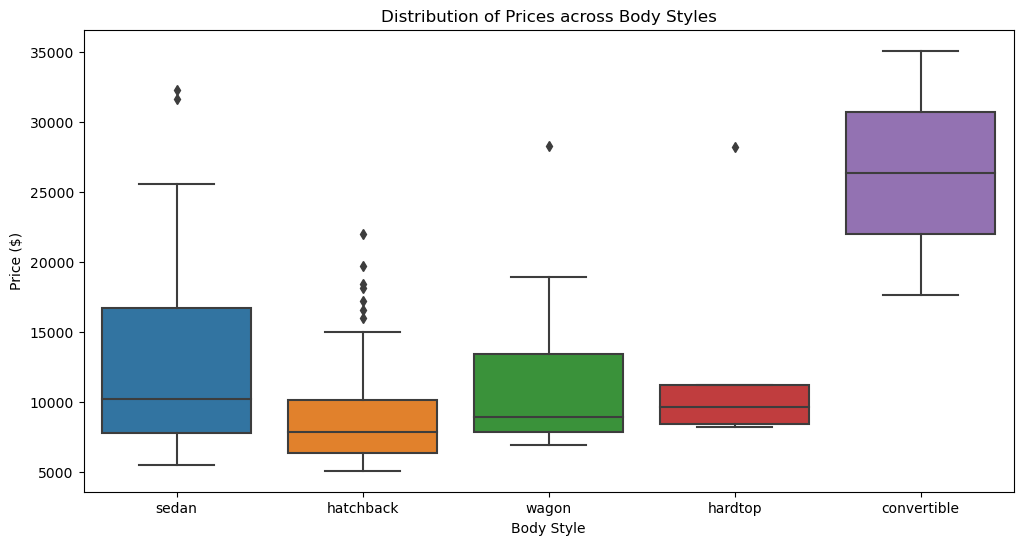

In [28]:
# Box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='body-style', y='price')
plt.title("Distribution of Prices across Body Styles")
plt.xlabel("Body Style")
plt.ylabel("Price ($)")
plt.show()



This visualization shows the spread of prices for each body style. Sedans or convertibles have a broader range of prices, indicating that they cater to both the medium budget and luxury markets. In contrast, hardtops and hatchbacks have a much more narrow price distribution, indicating that they are most likely budget cars.

Visualization 3: Count Plot - Number of Cars by Make

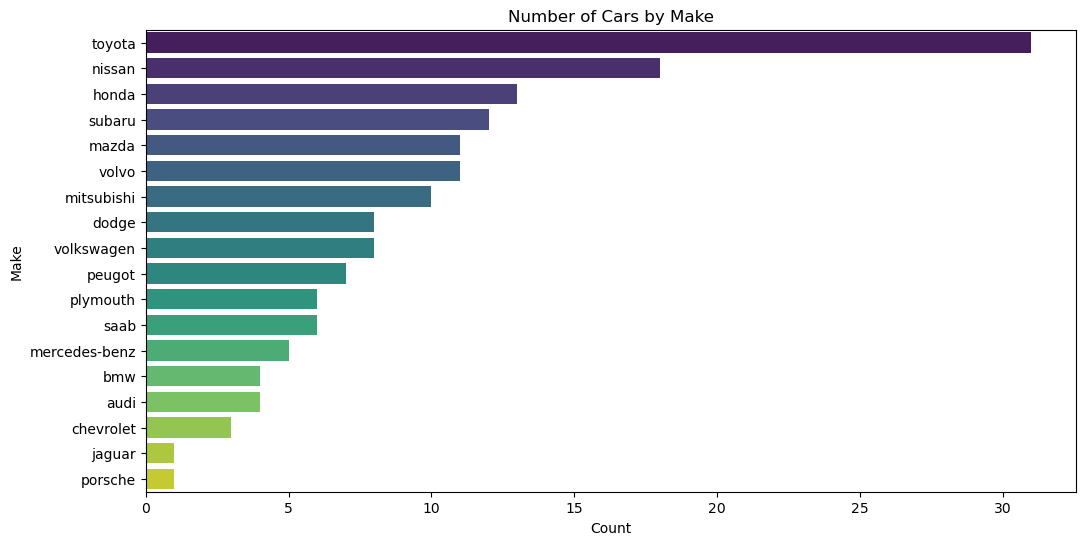

In [29]:
# Count plot
plt.figure(figsize=(12,6))
# viridis was the most appealing color scheme for this data
sns.countplot(data=df, y='make', order=df['make'].value_counts().index, palette='viridis')
plt.title("Number of Cars by Make")
plt.xlabel("Count")
plt.ylabel("Make")
plt.show()


This plot shows us the number of cars for each type of make. What we can see is that toyota leads the pack with almost twice as many cars as every other producer. This could indicate that toyota is the most popular or mainstream manufactur that produce a wide variety of models. It could also indicate that toyota creates a wide variety of cars ranging from budget to luxury.